<h1> Geographic data in Datalab </h1>

This notebook demonstrates how to use Datalab to display the earthquakes that have happened over the past 7 days. The data come from USGS, and we will use the Python module basemap to do the plotting.

<h3> Install basemap </h3>

Datalab does not come pre-installed with basemap. So, let's use apt-get to install basemap. Note that once you install a package, <b>you have to restart the Python kernel</b>, which you do by clicking on "Reset Session" in the top-menu.

In [ ]:
%bash
echo 'Y' | apt-get install python-mpltoolkits.basemap

<h3> Import packages we need </h3>

We'll get the data from USGS via http as a CSV file.  Then, we'll use basemap to plot.

<!--
Copyright 2016 Google Inc.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
-->

In [1]:
import csv
import urllib2
import cStringIO
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

<h3> Declare classes to hold data </h3>

We'll store the latitude, longitude, magnitude and timestamp of each earthquake and get the data itself from a one-week file that USGS keeps up-to-date. So, each time you run this, you will get a similarly formatted file but the most up-to-date list of earthquakes.

In [17]:
class EarthQuake:
  def __init__(self, row):
    # Parse earthquake data from USGS
    self.timestamp = row[0]
    self.lat = float(row[1])
    self.lon = float(row[2])
    try:
      self.magnitude = float(row[4])
    except ValueError:
      self.magnitude = 0
    
def get_earthquake_data(url):
  # Read CSV earthquake data from USGS
  response = urllib2.urlopen(url)
  csvio = cStringIO.StringIO(response.read())
  reader = csv.reader(csvio)
  header = next(reader)
  quakes = [EarthQuake(row) for row in reader]
  quakes = [q for q in quakes if q.magnitude > 0]
  return quakes
  
quakes = get_earthquake_data('http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_week.csv')
print quakes[0].__dict__

{'lat': 33.7578333, 'timestamp': '2016-03-19T19:02:26.270Z', 'magnitude': 0.84, 'lon': -117.5111667}


<h3>Plot the quakes</h3>

Let's now use Basemap to display the downloaded data.  First thing is to set up the projection and view.  To display the earthquake data, we'll use small circles that are sized and colored based on magnitude.

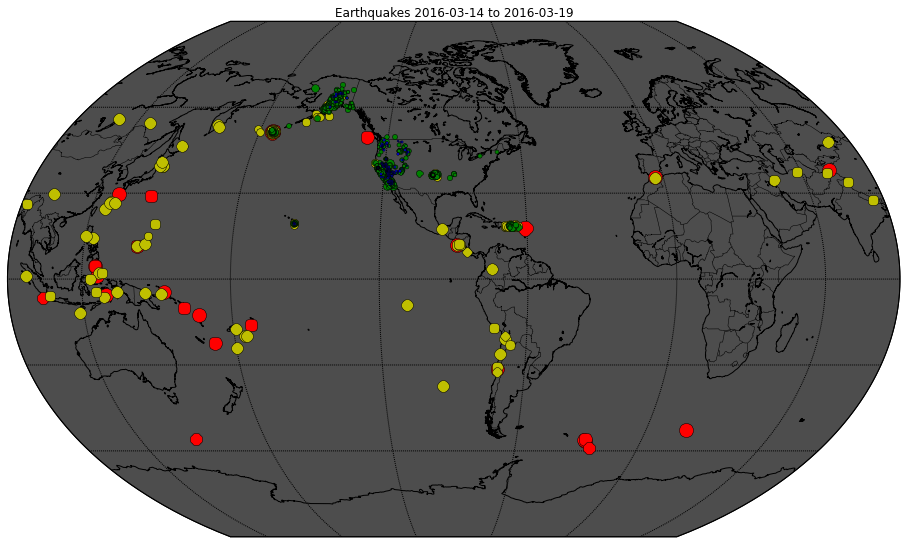

In [14]:
# Set up Basemap
mpl.rcParams['figure.figsize'] = '16, 12'
m = Basemap(projection='kav7', lon_0=-90, resolution = 'l', area_thresh = 1000.0)
m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='0.3')
m.drawparallels(np.arange(-90.,99.,30.))
junk = m.drawmeridians(np.arange(-180.,180.,60.))

# control marker color and size based on magnitude
def get_marker(magnitude):
    markersize = magnitude * 2.5;
    if magnitude < 1.0:
        return ('bo'), markersize
    if magnitude < 3.0:
        return ('go'), markersize
    elif magnitude < 5.0:
        return ('yo'), markersize
    else:
        return ('ro'), markersize

# sort earthquakes by magnitude so that weaker earthquakes
# are plotted after (i.e. on top of) stronger ones
# the stronger quakes have bigger circles, so we'll see both
quakes.sort(key=lambda q: q.magnitude, reverse=True)

# add earthquake info to the plot
for q in quakes:
    x,y = m(q.lon, q.lat)
    mcolor, msize = get_marker(q.magnitude)
    m.plot(x, y, mcolor, markersize=msize)

# add a title
plt.title("Earthquakes {0} to {1}".format(quakes[-1].timestamp[:10],
                                          quakes[0].timestamp[:10]))

Copyright 2016 Google Inc.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

vlakshmanan AT google.com